In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from pathlib import Path

from classifier.file_reader import read_files_from_folder
from evaluations.utils.wandb_loader import download_log_data, load_all_histories_to_dataframe
from plots.utils.plotting import write_figure_to_disk

NOTEBOOK_PATH = Path("experiments.ipynb").absolute().parent

DATA_DIR = f"{NOTEBOOK_PATH}/data/online_api_together"

BENCHMARK_NAMES = ["arc_challenge", "arc_easy", "boolq", "lambada_standard", "logiqa", "logiqa2", "piqa", "sciq", "social_iqa", "winogrande"]
# BENCHMARK_NAMES = ["winogrande"]

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})



In [2]:
run_summary_df = download_log_data(
    entity="tum-i13",
    project_name="mess-plus-api-pricing",
    save_dir=DATA_DIR,
    batch_size=50
)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


2025-06-07 13:36:45,725 - evaluations.utils.wandb_loader - INFO - Found 1860 total runs in project


True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


2025-06-07 13:38:45,170 - evaluations.utils.wandb_loader - INFO - Processing batch of 50 runs (starting at index 0)
2025-06-07 13:38:45,172 - evaluations.utils.wandb_loader - INFO - Downloading run sdpceri2: arc_challenge_V=0.1_a=0.4_c=1.0_seed=42_together.ai
2025-06-07 13:38:45,813 - evaluations.utils.wandb_loader - INFO - Checkpoint saved: 1 runs processed
2025-06-07 13:38:45,813 - evaluations.utils.wandb_loader - INFO - Downloading run nd28d4mz: boolq_V=0.1_a=0.7_c=1.0_seed=42_together.ai
2025-06-07 13:38:47,097 - evaluations.utils.wandb_loader - INFO - Checkpoint saved: 2 runs processed
2025-06-07 13:38:47,097 - evaluations.utils.wandb_loader - INFO - Downloading run esc9qwqc: arc_easy_V=0.1_a=0.65_c=1.0_seed=42_together.ai
2025-06-07 13:38:48,867 - evaluations.utils.wandb_loader - INFO - Checkpoint saved: 3 runs processed
2025-06-07 13:38:48,868 - evaluations.utils.wandb_loader - INFO - Downloading run x8xkfgsp: logiqa_V=0.1_a=0.3_c=1.0_seed=42_together.ai
2025-06-07 13:38:49,577 

In [3]:
display(run_summary_df)
run_df = load_all_histories_to_dataframe(DATA_DIR)

for name in BENCHMARK_NAMES:
	run_df.loc[run_df["run_name"].str.contains(name), "benchmark_name"] = name
	run_df.loc[run_df["run_name"].str.contains(name), "run_name"] = run_df.loc[run_df["run_name"].str.contains(name), "run_name"].str.replace(f"{name}_", "")

run_df[["V", "alpha", "c", "seed", "api_provider"]] = run_df["run_name"].str.split("_", expand=True)
run_df["alpha"] = run_df["alpha"].str.replace("a=", "")
run_df["V"] = run_df["V"].str.replace("V=", "")
run_df["c"] = run_df["c"].str.replace("c=", "")
run_df["seed"] = run_df["seed"].str.replace("seed=", "")
run_df["alpha"] = run_df["alpha"].astype(float)
run_df["V"] = run_df["V"].astype(float)
run_df["c"] = run_df["c"].astype(float)
run_df["seed"] = run_df["seed"].astype(int)

run_df["models/small_chosen"] = run_df["models/small_chosen"].astype(float)
run_df["models/medium_chosen"] = run_df["models/medium_chosen"].astype(float)
run_df["models/large_chosen"] = run_df["models/large_chosen"].astype(float)

display(run_df.head())

,id,name,path,url,created_at,tags,summary,config
0,sdpceri2,arc_challenge_V=0.1_a=0.4_c=1.0_seed=42_togeth...,"[tum-i13, mess-plus-api-pricing, sdpceri2]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:09Z,[],"{'V': 0.1, 'alpha': 0.4, 'avg_accuracy': 0.433...","{'seed': 43, 'lm_eval': {'benchmarks': ['arc_c..."
1,nd28d4mz,boolq_V=0.1_a=0.7_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, nd28d4mz]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:11Z,[],"{'V': 0.1, 'alpha': 0.7, 'avg_accuracy': 0.723...","{'seed': 43, 'lm_eval': {'benchmarks': ['boolq..."
2,esc9qwqc,arc_easy_V=0.1_a=0.65_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, esc9qwqc]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:12Z,[],"{'V': 0.1, 'alpha': 0.65, 'avg_accuracy': 0.66...","{'seed': 43, 'lm_eval': {'benchmarks': ['arc_e..."
3,x8xkfgsp,logiqa_V=0.1_a=0.3_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, x8xkfgsp]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:13Z,[],"{'V': 0.1, 'alpha': 0.3, 'avg_accuracy': 0.320...","{'seed': 43, 'lm_eval': {'benchmarks': ['logiq..."
4,tlcbkfq4,lambada_standard_V=0.1_a=0.3_c=1.0_seed=42_tog...,"[tum-i13, mess-plus-api-pricing, tlcbkfq4]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:14Z,[],"{'V': 0.1, 'alpha': 0.3, 'avg_accuracy': 0.529...","{'seed': 43, 'lm_eval': {'benchmarks': ['lamba..."
...,...,...,...,...,...,...,...,...
1855,7euc9qad,lambada_standard_V=0.01_a=0.45_c=0.01_seed=44_...,"[tum-i13, mess-plus-api-pricing, 7euc9qad]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-05T00:45:22Z,[],"{'V': 0.01, 'alpha': 0.45, 'avg_accuracy': 0.5...","{'seed': 43, 'lm_eval': {'benchmarks': ['lamba..."
1856,fmk4y8b1,lambada_standard_V=0.001_a=0.45_c=0.01_seed=44...,"[tum-i13, mess-plus-api-pricing, fmk4y8b1]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-05T00:47:09Z,[],"{'V': 0.001, 'alpha': 0.45, 'avg_accuracy': 0....","{'seed': 43, 'lm_eval': {'benchmarks': ['lamba..."
1857,bwnq07a1,lambada_standard_V=0.0001_a=0.45_c=0.01_seed=4...,"[tum-i13, mess-plus-api-pricing, bwnq07a1]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-05T00:48:55Z,[],"{'V': 0.0001, 'alpha': 0.45, 'avg_accuracy': 0...","{'seed': 43, 'lm_eval': {'benchmarks': ['lamba..."
1858,60k5okut,lambada_standard_V=1e-05_a=0.45_c=0.01_seed=44...,"[tum-i13, mess-plus-api-pricing, 60k5okut]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-05T00:50:42Z,[],"{'V': 1e-05, 'alpha': 0.45, 'avg_accuracy': 0....","{'seed': 43, 'lm_eval': {'benchmarks': ['lamba..."


2025-06-08 09:55:35,351 - evaluations.utils.wandb_loader - INFO - Found 1860 run directories


Loading run histories:   0%|          | 0/1860 [00:00<?, ?it/s]

2025-06-08 09:55:56,743 - evaluations.utils.wandb_loader - INFO - Combined DataFrame shape: (4381230, 27)
2025-06-08 09:55:56,745 - evaluations.utils.wandb_loader - INFO - Total rows: 4381230
2025-06-08 09:55:56,984 - evaluations.utils.wandb_loader - INFO - Unique runs: 1860
2025-06-08 09:55:56,985 - evaluations.utils.wandb_loader - INFO - Metrics available: ['step_cost_usd', '_step', 'avg_accuracy', 'mess_plus/exploration_step_ratio', '_runtime', 'models/small_chosen', 'mess_plus/x_t', 'models/medium_chosen', 'models/large_chosen', 'total_runtime', 'running_avg_cost_usd', 'mess_plus/q_length', 'mess_plus/chosen_model', 'mess_plus/p_t', 'step_time', '_timestamp', 'mess_plus/step_cost_usd', 'classifier/train_loss', 'created_at']


,step_cost_usd,_step,avg_accuracy,mess_plus/exploration_step_ratio,_runtime,models/small_chosen,mess_plus/x_t,models/medium_chosen,models/large_chosen,total_runtime,...,config_run_name,config_algorithm,config_model_zoo,config_classifier_model,benchmark_name,V,alpha,c,seed,api_provider
0,0.000007,0,0.000000,0.0,0.775077,1.000000,0,0.000000,0.0,0.122653,...,baseline,NaN,NaN,NaN,lambada_standard,0.000001,0.45,0.01,44,together.ai
1,0.000019,1,0.000000,0.0,0.816910,0.500000,0,0.500000,0.0,0.641551,...,baseline,NaN,NaN,NaN,lambada_standard,0.000001,0.45,0.01,44,together.ai
2,0.000030,2,0.333333,0.0,0.818244,0.333333,0,0.666667,0.0,1.162482,...,baseline,NaN,NaN,NaN,lambada_standard,0.000001,0.45,0.01,44,together.ai
3,0.000019,3,0.500000,0.0,0.837558,0.250000,0,0.750000,0.0,1.684398,...,baseline,NaN,NaN,NaN,lambada_standard,0.000001,0.45,0.01,44,together.ai
4,0.000008,4,0.400000,0.0,0.856805,0.400000,0,0.600000,0.0,1.800643,...,baseline,NaN,NaN,NaN,lambada_standard,0.000001,0.45,0.01,44,together.ai


In [7]:
display(run_df.columns)
analysis_df = run_df.loc[(run_df["c"] == 1.0) & (run_df["benchmark_name"] == "winogrande")].pivot_table(index=["benchmark_name", "alpha", "V", "c"], values=["avg_accuracy", "running_avg_cost_usd", "mess_plus/q_length", "total_runtime"], aggfunc={"avg_accuracy": "mean", "running_avg_cost_usd": "sum", "mess_plus/q_length": "mean", "total_runtime": "max"})

Index(['step_cost_usd', '_step', 'avg_accuracy',
       'mess_plus/exploration_step_ratio', '_runtime', 'models/small_chosen',
       'mess_plus/x_t', 'models/medium_chosen', 'models/large_chosen',
       'total_runtime', 'running_avg_cost_usd', 'mess_plus/q_length',
       'mess_plus/chosen_model', 'mess_plus/p_t', 'step_time', '_timestamp',
       'mess_plus/step_cost_usd', 'classifier/train_loss', 'run_id',
       'run_name', 'created_at', 'config_seed', 'config_lm_eval',
       'config_run_name', 'config_algorithm', 'config_model_zoo',
       'config_classifier_model', 'benchmark_name', 'V', 'alpha', 'c', 'seed',
       'api_provider'],
      dtype='object')

In [8]:
def add_value_labels(axx, spacing=5, convert_to_mj: bool = True):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in axx.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if convert_to_mj:
            label = f'{y_value / 1_000_000:.1f}' # MJ conversion
        else:
            label = f'{y_value:.2f}'

        # Create annotation
        axx.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

def fmt_to_megajoules(x, pos):
    return f'{(x / 1_000_000):.0f}'


In [9]:
# Load raw inference data

infer_df = pd.DataFrame()
def get_inference_data(benchmark_name):
	try:
		input_df = read_files_from_folder(folder_path=f"{NOTEBOOK_PATH.parent}/data/inference_outputs/{benchmark_name}")
		input_df["idx_original"] = input_df.index
		input_df = input_df.sample(frac=1).reset_index(drop=True)

		return input_df
	except ValueError:
		return pd.DataFrame()

for name in BENCHMARK_NAMES:
	infer_df = pd.concat([infer_df, get_inference_data(name)], ignore_index=True)

infer_df.reset_index(inplace=True)

# Get baseline dataframe
BASELINE_DATA_DIR = f"{NOTEBOOK_PATH}/data/random_baseline_v02"
baseline_summary_df = download_log_data(
    entity="tum-i13",
    project_name="mess_plus_random_baseline_with_constraint_v02",
    save_dir=BASELINE_DATA_DIR,
    batch_size=5
)

baseline_df = load_all_histories_to_dataframe(BASELINE_DATA_DIR)

for benchmark in BENCHMARK_NAMES:
	baseline_df.loc[baseline_df["run_name"].str.contains(benchmark), "benchmark_name"] = benchmark
	baseline_df.loc[baseline_df["run_name"].str.contains(benchmark), "run_name"] = baseline_df.loc[baseline_df["run_name"].str.contains(benchmark), "run_name"].str.replace(f"{benchmark}_alpha=", "")
	baseline_df.loc[baseline_df["benchmark_name"] == benchmark, "alpha"] = baseline_df.loc[baseline_df["benchmark_name"] == benchmark, "run_name"]

	baseline_df["alpha"] = baseline_df["alpha"].astype(float)


print(baseline_df.head())


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


2025-06-09 22:29:17,650 - evaluations.utils.wandb_loader - INFO - Found 24 total runs in project


True
True
True
True


2025-06-09 22:29:17,657 - evaluations.utils.wandb_loader - INFO - Processing batch of 5 runs (starting at index 0)
2025-06-09 22:29:17,658 - evaluations.utils.wandb_loader - INFO - Processing batch of 5 runs (starting at index 5)
2025-06-09 22:29:17,659 - evaluations.utils.wandb_loader - INFO - Processing batch of 5 runs (starting at index 10)
2025-06-09 22:29:17,660 - evaluations.utils.wandb_loader - INFO - Processing batch of 5 runs (starting at index 15)
2025-06-09 22:29:17,660 - evaluations.utils.wandb_loader - INFO - Processing batch of 4 runs (starting at index 20)
2025-06-09 22:29:17,665 - evaluations.utils.wandb_loader - INFO - Download complete! Downloaded 0 runs
2025-06-09 22:29:17,665 - evaluations.utils.wandb_loader - INFO - All data saved to /Users/herbert/code/mess-plus/evaluations/data/random_baseline_v02
2025-06-09 22:29:17,667 - evaluations.utils.wandb_loader - INFO - Found 24 run directories


Loading run histories:   0%|          | 0/24 [00:00<?, ?it/s]

2025-06-09 22:29:17,892 - evaluations.utils.wandb_loader - INFO - Combined DataFrame shape: (44862, 19)
2025-06-09 22:29:17,892 - evaluations.utils.wandb_loader - INFO - Total rows: 44862
2025-06-09 22:29:17,894 - evaluations.utils.wandb_loader - INFO - Unique runs: 24
2025-06-09 22:29:17,895 - evaluations.utils.wandb_loader - INFO - Metrics available: ['mess_plus/energy', '_step', 'model_choice', 'avg_accuracy', '_runtime', 'models/small_chosen', 'models/medium_chosen', 'models/large_chosen', 'mess_plus/q_length', '_timestamp', 'created_at']
/var/folders/yz/mgc_jz0x28j0kgl9dm72cwp40000gn/T/ipykernel_62830/1493590062.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.8' '0.8' '0.8' ... '0.75' '0.75' '0.75']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  baseline_df.loc[baseline_df["benchmark_name"] == benchmark, "alpha"] = baseline_df.loc[baseline_df["be

   mess_plus/energy  _step  model_choice  avg_accuracy  _runtime  \
0           307.954      0             1      1.000000  0.491183   
1          1532.540      1             2      0.500000  0.491380   
2            60.625      2             0      0.666667  0.491711   
3            66.998      3             0      0.500000  0.491838   
4            57.144      4             0      0.600000  0.491934   

   models/small_chosen  models/medium_chosen  models/large_chosen  \
0             0.000000              1.000000             0.000000   
1             0.000000              0.500000             0.500000   
2             0.333333              0.333333             0.333333   
3             0.500000              0.250000             0.250000   
4             0.600000              0.200000             0.200000   

   mess_plus/q_length    _timestamp  ... run_name            created_at  \
0                0.00  1.747102e+09  ...     0.42  2025-05-13T02:05:46Z   
1                0.42  1.7

/var/folders/yz/mgc_jz0x28j0kgl9dm72cwp40000gn/T/ipykernel_62830/1493590062.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.42' '0.42' '0.42' ... '0.44' '0.44' '0.44']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  baseline_df.loc[baseline_df["benchmark_name"] == benchmark, "alpha"] = baseline_df.loc[baseline_df["benchmark_name"] == benchmark, "run_name"]
/var/folders/yz/mgc_jz0x28j0kgl9dm72cwp40000gn/T/ipykernel_62830/1493590062.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.7' '0.7' '0.7' ... '0.75' '0.75' '0.75']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  baseline_df.loc[baseline_df["benchmark_name"] == benchmark, "alpha"] = baseline_df.loc[baseline_df["benchmark_name"] == benchmark, "run_name"]


In [ ]:
# Load the RouteLLM evaluations
ROUTELLM_DATA_DIR = f"{NOTEBOOK_PATH}/data/routellm_baseline_v01"
routellm_summary_df = download_log_data(
    entity="tum-i13",
    project_name="routellm_baseline_v01",
    save_dir=ROUTELLM_DATA_DIR,
    batch_size=50
)

routellm_bs_df = load_all_histories_to_dataframe(ROUTELLM_DATA_DIR)

for benchmark in BENCHMARK_NAMES:
	routellm_bs_df.loc[routellm_bs_df["run_name"].str.contains(benchmark), "benchmark_name"] = benchmark
	routellm_bs_df.loc[routellm_bs_df["run_name"].str.contains(benchmark), "run_name_updated"] = routellm_bs_df.loc[routellm_bs_df["run_name"].str.contains(benchmark), "run_name"].str.replace(f"{benchmark}_", "")


routellm_bs_df[["alpha", "threshold"]] = routellm_bs_df["run_name_updated"].str.split("_", expand=True)
routellm_bs_df["alpha"] = routellm_bs_df["alpha"].str.replace("alpha=", "")
routellm_bs_df["threshold"] = routellm_bs_df["threshold"].str.replace("thres=", "")
routellm_bs_df["alpha"] = routellm_bs_df["alpha"].astype(float)
routellm_bs_df["threshold"] = routellm_bs_df["threshold"].astype(float)


In [ ]:
# Load the RouterDC evaluations
ROUTERDC_DATA_DIR = f"{NOTEBOOK_PATH}/data/routerdc_baseline_v01"
routellm_summary_df = download_log_data(
    entity="tum-i13",
    project_name="routerdc_baseline_v01",
    save_dir=ROUTERDC_DATA_DIR,
    batch_size=50
)

routerdc_bs_df = load_all_histories_to_dataframe(ROUTERDC_DATA_DIR)
routerdc_bs_df[["benchmark_name", "alpha"]] = routerdc_bs_df["run_name"].str.replace("routerdc-", "").str.split("-", expand=True)
routerdc_bs_df["alpha"] = routerdc_bs_df["alpha"].str.replace("alpha=", "").astype(float)

display(routerdc_bs_df)

In [ ]:
ROUTELLM_THRESHOLD_ALPHA_MAP = {}
for benchmark in BENCHMARK_NAMES:
	routellm_subset = routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == benchmark)]

	if len(routellm_subset) == 0:
		continue

	# sns.set_style("whitegrid")
	# sns.set_theme(context='paper', style='whitegrid', palette='colorblind', font='sans-serif', font_scale=1.8, color_codes=True, rc=None)
	#
	# # Create a figure and a grid of subplots: 4 rows, 10 columns
	# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

	alpha_vals_bm = routellm_subset["alpha"].unique().tolist()
	threshold_vals = routellm_subset["threshold"].sort_values(ascending=False).unique().tolist()

	thres_acc_mapping = {i: 0.0 for i in threshold_vals}
	alpha_thresh_mapping = {a: 0.0 for a in alpha_vals_bm}
	# Get final accuracy for each threshold
	for alpha in alpha_vals_bm:
		alpha_thres_value_match = False
		for thresh in threshold_vals:

			if alpha_thres_value_match is True:
				continue

			data = routellm_subset.loc[(routellm_subset["alpha"] == alpha) & (routellm_subset["threshold"] == thresh)]
			threshold_accuracy = data.loc[data["_step"] > data["_step"].max() - 30, ["avg_accuracy"]].mean()

			if threshold_accuracy.item() >= alpha:
				alpha_thresh_mapping[alpha] = thresh
				alpha_thres_value_match = True

	ROUTELLM_THRESHOLD_ALPHA_MAP[benchmark] = alpha_thresh_mapping

display(ROUTELLM_THRESHOLD_ALPHA_MAP)


In [11]:
v_values_per_benchmark = {
    "arc_challenge": [0.001, 0.0001, 0.00001],
    "arc_easy": [0.01, 0.001, 0.0001],
    "boolq": [0.01, 0.001, 0.0001],
    # "lambada_standard": [0.01, 0.001, 0.0001],
    "logiqa": [0.001, 0.0001, 0.00001],
    # "logiqa2": [0.01, 0.001, 0.0001],
    "piqa": [0.01, 0.001, 0.0001],
    "sciq": [0.0001, 0.00001, 0.000001],
    "social_iqa": [0.001, 0.0001, 0.00001],
    "winogrande": [0.01, 0.001, 0.0001],
}

Plot saved.


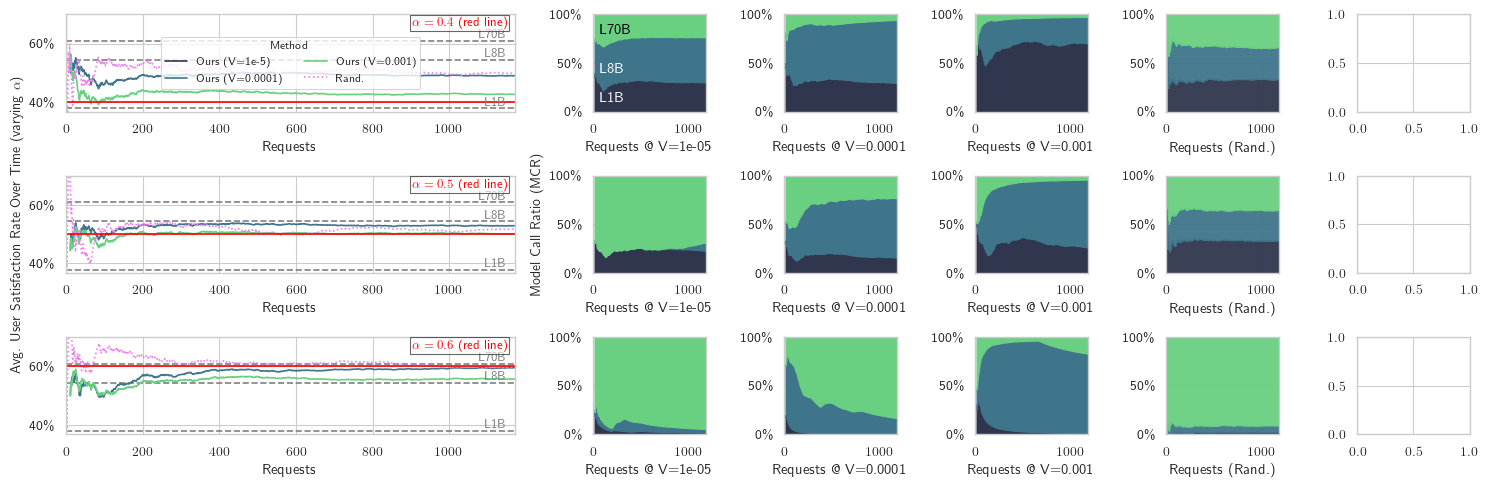

In [14]:
# Set the style for all plots
sns.set_style("whitegrid")
sns.set_palette(palette="dark:#5A9_r")

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.1, color_codes=True, rc=None)

# Create a figure and a grid of subplots: 4 rows, 10 columns
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(15, 5), gridspec_kw={'width_ratios': [4, 1, 1, 1, 1, 1]})

# # Flatten the 2D array of axes for easier iteration
# axes = axes.flatten()

name = "arc_challenge"
subset = run_df.loc[(run_df["benchmark_name"] == name) & (run_df["c"] == 0.1) & (run_df["V"].isin(v_values_per_benchmark[name])) & (run_df["_step"] > 10)]
subset = subset.sort_values(by=["alpha"])

def format_v_value(b):
	if b < 0.0001:
		b = b * 100
		b = b / 100

	return f"Ours (V={b})"

subset["V"] = subset["V"].apply(format_v_value)

iterator = 0
for alpha in subset["alpha"].unique().tolist():
	v_values = subset["V"].unique().tolist()
	c_values = subset["c"].unique().tolist()

	# alpha = target_alpha_per_benchmark[name]

	# Accuracy Plot
	raw_inference_accuracies_per_model = infer_df[["benchmark_name", "label_small", "label_medium", "label_large"]].groupby("benchmark_name").mean().loc[name]

	axes[iterator][0].text(s="L1B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_small"] + 0.01, color='gray', fontsize=9, ha="right")
	axes[iterator][0].text(s="L8B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_medium"] + 0.01, color='gray', fontsize=9, ha="right")
	axes[iterator][0].text(s="L70B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_large"] + 0.01, color='gray', fontsize=9, ha="right")
	axes[iterator][0].axhline(y=raw_inference_accuracies_per_model["label_small"], color='gray', linestyle='--')
	axes[iterator][0].axhline(y=raw_inference_accuracies_per_model["label_medium"], color='gray', linestyle='--')
	axes[iterator][0].axhline(y=raw_inference_accuracies_per_model["label_large"], color='gray', linestyle='--')

	sns.lineplot(
	    data=subset.loc[(subset["alpha"] == alpha)],
	    x="_step",
	    y="avg_accuracy",
	    hue="V",
		errorbar=None,
		ax=axes[iterator][0],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=1e-5)", "Ours (V=0.0001)", "Ours (V=0.001)"],
	)

	axes[iterator][0].plot(
		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha), "_step"],
		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha),"avg_accuracy"],
		color="violet", linestyle="dotted", label="Rand."
	)

	# Add RouteLLM baseline
	# axes[iterator][0].plot(
	# 	routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]), "_step"],
	# 	routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]), "avg_accuracy"],
	# 	color="brown", linestyle="dotted", label="RouteLLM"
	# )

	if iterator == 0:
		axes[iterator][0].legend(loc="center", ncol=2, title="Method", fontsize=8, title_fontsize=8)

	axes[iterator][0].axhline(y=alpha, color='red', linestyle='-', label="alpha")
	axes[iterator][0].set(ylim=[0.97 * raw_inference_accuracies_per_model["label_small"], 1.15 * raw_inference_accuracies_per_model["label_large"]])
	axes[iterator][0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

	# Add alpha marker
	t1 = axes[iterator][0].text(s=r"$ \alpha = {alpha_val} $ (red line)".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=1.15 * raw_inference_accuracies_per_model["label_large"] - 0.04, color='red', fontsize=9, ha="right")
	t1.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='black', pad=1.5))

	# Stackplot for Model Call Ratio
	v_values_per_benchmark[name] = sorted(v_values_per_benchmark[name], reverse=False)
	# v_values_per_benchmark[name].reverse()
	for jdx, V in enumerate(v_values_per_benchmark[name]):

		stack_df = subset.loc[
			(run_df["benchmark_name"] == name) &
			(run_df["V"] == V) &
			(subset["alpha"] == alpha),
			["_step", "models/small_chosen", "models/medium_chosen", "models/large_chosen"]
		].groupby(["_step"]).mean().reset_index()

		x = stack_df["_step"]
		y = stack_df[["models/small_chosen", "models/medium_chosen", "models/large_chosen"]]
		y_stack = np.cumsum(y, axis=1)

		axes[iterator][1 + jdx].fill_between(x, 0, y_stack.iloc[:, 0], color="#2f364d", alpha=1.0)
		axes[iterator][1 + jdx].fill_between(x, y_stack.iloc[:, 0], y_stack.iloc[:, 1], color="#3f758a", alpha=1.0)
		axes[iterator][1 + jdx].fill_between(x, y_stack.iloc[:, 1], y_stack.iloc[:, 2], color="#69cf81", alpha=1.0)
		axes[iterator][1 + jdx].set(xlabel=f"Requests @ V={V}", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()], ylim=[0, 1])
		axes[iterator][1 + jdx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
		axes[iterator][1 + jdx].set(xlim=[0, stack_df["_step"].max()])

		if iterator == 0 and jdx == 0:
			axes[iterator][1 + jdx].text(s="L70B", x=70, y=0.80, color="black")
			axes[iterator][1 + jdx].text(s="L8B", x=70, y=0.40, color="white")
			axes[iterator][1 + jdx].text(s="L1B", x=70, y=0.10, color="white")

	# Add area plot for random baseline with constraint.
	baseline_stack_df = baseline_df.loc[
			(baseline_df["benchmark_name"] == name) &
			(baseline_df["alpha"] == alpha),
			["_step", "models/small_chosen", "models/medium_chosen", "models/large_chosen"]
		].groupby(["_step"]).mean().reset_index()

	x_base = baseline_stack_df["_step"]
	y_base = baseline_stack_df[["models/small_chosen", "models/medium_chosen", "models/large_chosen"]]
	y_stack_base = np.cumsum(y_base, axis=1)

	axes[iterator][4].fill_between(x_base, 0, y_stack_base.iloc[:, 0], color="#2f364d", alpha=0.95)
	axes[iterator][4].fill_between(x_base, y_stack_base.iloc[:, 0], y_stack_base.iloc[:, 1], color="#3f758a", alpha=0.95)
	axes[iterator][4].fill_between(x_base, y_stack_base.iloc[:, 1], y_stack_base.iloc[:, 2], color="#69cf81", alpha=0.95)
	axes[iterator][4].set(xlabel=f"Requests (Rand.)", xlim=[0, baseline_stack_df["_step"].max()], ylim=[0, 1])
	axes[iterator][4].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
	axes[iterator][4].set(xlim=[0, baseline_stack_df["_step"].max()])
	# axes[iterator][6].get_yaxis().set_visible(False)

	# Add area plot for RouteLLM baseline
	# routellm_stack_df = routellm_bs_df.loc[
	# 		(routellm_bs_df["benchmark_name"] == name) &
	# 		(routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]),
	# 		["_step", "models/small_chosen", "models/large_chosen"]
	# 	].groupby(["_step"]).mean().reset_index()

	# x_rllm = routellm_stack_df["_step"]
	# y_rllm = routellm_stack_df[["models/small_chosen", "models/large_chosen"]]
	# y_stack_rllm = np.cumsum(y_rllm, axis=1)

	# axes[iterator][5].fill_between(x_rllm, 0, y_stack_rllm.iloc[:, 0], color="#2f364d", alpha=0.95)
	# axes[iterator][5].fill_between(x_rllm, y_stack_rllm.iloc[:, 0], y_stack_rllm.iloc[:, 1], color="#69cf81", alpha=0.95)
	# axes[iterator][6].fill_between(x_rllm, y_stack_rllm.iloc[:, 1], y_stack_rllm.iloc[:, 2], color="#69cf81", alpha=0.95)
	# axes[iterator][5].set(xlabel=f"Req. (RouteLLM)", xlim=[0, routellm_stack_df["_step"].max()], ylim=[0, 1])
	# axes[iterator][5].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
	# axes[iterator][5].set(xlim=[0, routellm_stack_df["_step"].max()])

	axes[iterator][0].set(xlabel="Requests", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])
	axes[iterator][0].set(ylabel=None)

	for ax, col in zip(axes[iterator], [r"Avg. User Satisfaction Rate Over Time (varying $\alpha$)".format(alpha_val=alpha), "Model Call Ratio (MCR)", "", ""]):

		if iterator == 1:
			ax.set_ylabel(col, rotation=90, size=10)

	iterator += 1

fig.tight_layout()
write_figure_to_disk(plt, file_name=f"{name}_all_alpha", chapter_name="evaluations")


Plot saved.


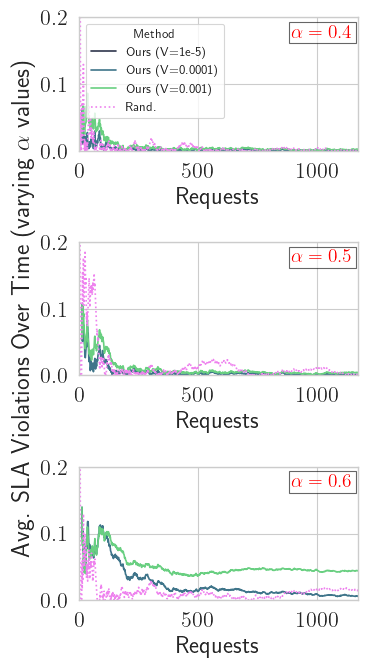

In [17]:
# Set the style for all plots
sns.set_style("whitegrid")
sns.set_palette(palette="dark:#5A9_r")

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.8, color_codes=True, rc=None)

# Create a figure and a grid of subplots: 4 rows, 10 columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 7))

# # Flatten the 2D array of axes for easier iteration
# axes = axes.flatten()

name = "arc_challenge"
subset = run_df.loc[(run_df["benchmark_name"] == name) & (run_df["c"] == 0.1) & (run_df["V"].isin(v_values_per_benchmark[name])) & (run_df["_step"] > 10)]
subset = subset.sort_values(by=["alpha"])

def format_v_value(b):
	if b < 0.0001:
		b = b * 100
		b = b / 100

	return f"Ours (V={b})"

subset["V"] = subset["V"].apply(format_v_value)

iterator = 0
for alpha in subset["alpha"].unique().tolist():
	v_values = subset["V"].unique().tolist()
	c_values = subset["c"].unique().tolist()

	# Q Plot for SLA violations
	subset.loc[(subset["alpha"] == alpha), "sla_violations"] = subset.loc[(subset["alpha"] == alpha), "mess_plus/q_length"] / subset.loc[(subset["alpha"] == alpha), "_step"]

	baseline_df.loc[(baseline_df["alpha"] == alpha), "sla_violations"] = baseline_df.loc[(baseline_df["alpha"] == alpha), "mess_plus/q_length"] / baseline_df.loc[(baseline_df["alpha"] == alpha), "_step"]

	# routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]), "sla_violations"] = routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]), "mess_plus/q_length"] / routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]), "_step"]

	sns.lineplot(
	    data=subset.loc[(subset["alpha"] == alpha)],
	    x="_step",
	    y="sla_violations",
	    hue="V",
		errorbar=None,
		ax=axes[iterator],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=1e-5)", "Ours (V=0.0001)", "Ours (V=0.001)"],
	)

	axes[iterator].plot(
		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha), "_step"],
		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha),"sla_violations"],
		color="violet", linestyle="dotted", label="Rand."
	)

	# Add RouteLLM baseline
	# axes[iterator].plot(
	# 	routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]), "_step"],
	# 	routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]), "sla_violations"],
	# 	color="brown", linestyle="dotted", label="RouteLLM"
	# )

	axes[iterator].set_ylim([0, 0.2])

	# Add alpha marker
	t1 = axes[iterator].text(s=r"$ \alpha = {alpha_val} $".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=0.17, color='red', fontsize=14, ha="right")
	t1.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='black', pad=1.5))

	if iterator == 0:
		axes[iterator].legend(ncols=1, title="Method", fontsize=9, title_fontsize=9, loc='upper left')

	axes[iterator].set(xlabel="Requests", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])

	axes[iterator].set(ylabel=None)

	for ax, col in zip(axes, ["", r"Avg. SLA Violations Over Time (varying $\alpha$ values)", ""]):
		ax.set_ylabel(col, rotation=90, size=18)

	iterator += 1

fig.tight_layout()
write_figure_to_disk(plt, file_name=f"{name}_sla_violations", chapter_name="evaluations")

In [18]:
print(infer_df.columns)
print(infer_df.groupby("benchmark_name")["energy_consumption_large"].mean())
print(infer_df.groupby("benchmark_name")["energy_consumption_medium"].mean())
print(infer_df.groupby("benchmark_name")["energy_consumption_small"].mean())

Index(['index', 'input_text', 'benchmark_name', 'label_small',
       'acc_norm_small', 'energy_consumption_small', 'inference_time_small',
       'label_medium', 'acc_norm_medium', 'energy_consumption_medium',
       'inference_time_medium', 'label_large', 'acc_norm_large',
       'energy_consumption_large', 'inference_time_large', 'idx_original',
       'acc_small', 'acc_medium', 'acc_large'],
      dtype='object')
benchmark_name
arc_challenge    2002.590887
arc_easy         2021.235757
boolq            1040.777086
logiqa           2103.261339
piqa             1000.305741
sciq             2230.167317
social_iqa       1534.331063
winogrande       1018.422575
Name: energy_consumption_large, dtype: float64
benchmark_name
arc_challenge    393.661659
arc_easy         389.570495
boolq            130.735684
logiqa           414.384779
piqa             198.286026
sciq             444.054969
social_iqa       301.791954
winogrande       200.450200
Name: energy_consumption_medium, dtype: float6

In [19]:
# # Plot generator
#
# BENCHMARK_NAME_DICT = {
#     "arc_challenge": "ARC Challenge",
#     "arc_easy": "ARC Easy",
#     "boolq": "BoolQ",
#     # "lambada_standard": "Lambada",
#     "logiqa": "LogiQA",
#     # "logiqa2": "LogiQA2",
#     "piqa": "PiQA",
#     "sciq": "SciQ",
#     "social_iqa": "SocialIQA",
#     "winogrande": "WinoGrande",
# }
#
# # Create a list of all benchmark-alpha combinations
# benchmark_alpha_combinations = []
# for name in v_values_per_benchmark.keys():
#     config_path = Path(f"{NOTEBOOK_PATH.parent}/config/online/{name}.yaml")
#     with config_path.open("r") as f:
#         import yaml
#         CONFIG = yaml.safe_load(f)
#
#     algorithm_config = CONFIG["algorithm"]
#     for alpha in algorithm_config["alpha_values"]:
#         benchmark_alpha_combinations.append((name, alpha))
#
# # Initialize plotting variables
# plot_num = 0
# col_count = 0
#
# # Iterate through all benchmark-alpha combinations
# for combo_idx, (name, alpha) in enumerate(benchmark_alpha_combinations):
#
#     # Create new figure every 6 columns
#     if col_count == 0:
#         sns.set(style="whitegrid")
#         fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(20, 12))
#         plot_num += 1
#
#     # Get current column index
#     col_idx = col_count
#
#     # Skip if this benchmark doesn't have V values configured
#     if name not in v_values_per_benchmark.keys():
#         continue
#
#     # Filter data for current benchmark and alpha
#     subset = run_df.loc[(run_df["benchmark_name"] == name) &
#                        (run_df["c"] == 0.1) &
#                        (run_df["V"].isin(v_values_per_benchmark[name])) &
#                        (run_df["_step"] > 10) &
#                        (run_df["alpha"] == alpha)]
#
#     v_values = subset["V"].unique().tolist()
#
#     # Accuracy Plot
#     raw_inference_accuracies_per_model = infer_df[["benchmark_name", "label_small", "label_medium", "label_large"]].groupby("benchmark_name").mean().loc[name]
#
#     axes[0][col_idx].text(s="Llama 3.1 1B", x=subset["_step"].min() + 20, y=raw_inference_accuracies_per_model["label_small"] + 0.025, color='gray', fontsize=8, ha="left")
#     axes[0][col_idx].text(s="Llama 3.1 8B", x=(subset["_step"].min() + 1/2 * subset["_step"].max()), y=raw_inference_accuracies_per_model["label_medium"] + 0.025, color='gray', fontsize=8, ha="center")
#     axes[0][col_idx].text(s="Llama 3.3 70B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_large"] + 0.025, color='gray', fontsize=8, ha="right")
#     axes[0][col_idx].axhline(y=raw_inference_accuracies_per_model["label_small"], color='gray', linestyle='--')
#     axes[0][col_idx].axhline(y=raw_inference_accuracies_per_model["label_medium"], color='gray', linestyle='--')
#     axes[0][col_idx].axhline(y=raw_inference_accuracies_per_model["label_large"], color='gray', linestyle='--')
#
#     sns.lineplot(
#         data=subset.loc[(subset["alpha"] == alpha)],
#         x="_step",
#         y="avg_accuracy",
#         hue="V",
#         errorbar=None,
#         ax=axes[0][col_idx],
#         legend=True if col_idx == 0 else False,
# 	    palette=["#2f364d", "#3f758a", "#69cf81"]
#     )
#
#     axes[0][col_idx].plot(
# 		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha), "_step"],
# 		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha),"avg_accuracy"],
# 		color="violet", linestyle="dotted", label="Rand."
# 	)
#
#     axes[0][col_idx].axhline(y=alpha, color='red', linestyle='-')
#     axes[0][col_idx].text(s=r"$ \alpha = {alpha_val} $ ".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=alpha + 0.01, color='red', fontsize=8, ha="right")
#
#     axes[0][col_idx].set(ylim=[0.97 * raw_inference_accuracies_per_model["label_small"], 1.15 * raw_inference_accuracies_per_model["label_large"]])
#
#     if col_idx == 0:
#         axes[0][col_idx].legend(ncols=2)
#
#     # Q Plot for SLA violations
#     subset.loc[(subset["alpha"] == alpha), "sla_violations"] = subset.loc[(subset["alpha"] == alpha), "mess_plus/q_length"] / subset.loc[(subset["alpha"] == alpha), "_step"]
#     sns.lineplot(
#         data=subset.loc[(subset["alpha"] == alpha)],
#         x="_step",
#         y="sla_violations",
#         hue="V",
#         errorbar=None,
#         ax=axes[1][col_idx],
#         legend=True if col_idx == 0 else False,
# 	    palette=["#2f364d", "#3f758a", "#69cf81"]
#     )
#
#     if col_idx == 0:
#         axes[1][col_idx].legend(ncols=2)
#
#     # Energy consumption plot
#     random_baseline_energy = baseline_df.loc[baseline_df["alpha"] == alpha, ["benchmark_name", "mess_plus/energy"]].groupby("benchmark_name").sum().loc[name].to_frame()
#     random_baseline_energy["V"] = "Rand."
#     random_baseline_energy["mess_plus/energy"] = random_baseline_energy[name]
#     random_baseline_energy.reset_index(inplace=True)
#
#     raw_inference_energy_data = infer_df[["benchmark_name", "energy_consumption_large", "energy_consumption_medium", "energy_consumption_small"]].groupby("benchmark_name").sum().loc[name].to_frame()
#     raw_inference_energy_data["V"] = raw_inference_energy_data.index
#     raw_inference_energy_data["mess_plus/energy"] = raw_inference_energy_data[name]
#     raw_inference_energy_data.rename({name: "mess_plus/energy"}, inplace=True)
#     raw_inference_energy_data.reset_index(inplace=True)
#
#     raw_inference_energy_data["V"] = raw_inference_energy_data["V"].replace({"energy_consumption_large": "70B", "energy_consumption_medium": "8B", "energy_consumption_small": "1B"}, inplace=False)
#
#     raw_inference_energy_data.drop([name, "index"], inplace=True, axis=1)
#     energy_data = subset.loc[(subset["alpha"] == alpha)].groupby(["_step", "V"]).agg({"mess_plus/energy": "mean"}).groupby("V")["mess_plus/energy"].sum().reset_index()
#
#     energy_data["V"] = energy_data["V"].apply(lambda sample: f"V={sample}")
#
#     energy_data = pd.concat([random_baseline_energy, raw_inference_energy_data, energy_data], ignore_index=True)
#     energy_data.reset_index(inplace=True)
#     energy_data = energy_data.sort_values(by=["mess_plus/energy"], ascending=False)
#
#     sns.barplot(
#         data=energy_data,
#         x="V",
#         y="mess_plus/energy",
#         ax=axes[2][col_idx],
#         errorbar=("ci", 0.95),
#     )
#
#     add_value_labels(axes[2][col_idx])
#     axes[2][col_idx].yaxis.set_major_formatter(plt.FuncFormatter(fmt_to_megajoules))
#     axes[2][col_idx].set(ylim=[0, 2 * energy_data["mess_plus/energy"].max()])
#     axes[2][col_idx].tick_params(axis='x', labelrotation=45)
#
#     # Stackplot for Model Call Ratio
#     for jdx, V in enumerate(v_values_per_benchmark[name]):
#
#         stack_df = subset.loc[
#             (run_df["benchmark_name"] == name) &
#             (run_df["V"] == V) &
#             (subset["alpha"] == alpha),
#             ["_step", "models/small_chosen", "models/medium_chosen", "models/large_chosen"]
#         ].groupby(["_step"]).mean().reset_index()
#
#         x = stack_df["_step"]
#         y = stack_df[["models/small_chosen", "models/medium_chosen", "models/large_chosen"]]
#         y_stack = np.cumsum(y, axis=1)
#
#         axes[3 + jdx][col_idx].fill_between(x, 0, y_stack.iloc[:, 0], color="#2f364d", alpha=0.95)
#         axes[3 + jdx][col_idx].fill_between(x, y_stack.iloc[:, 0], y_stack.iloc[:, 1], color="#3f758a", alpha=0.95)
#         axes[3 + jdx][col_idx].fill_between(x, y_stack.iloc[:, 1], y_stack.iloc[:, 2], color="#69cf81", alpha=0.95)
#         axes[3 + jdx][col_idx].set(xlabel=f"Request @ V={V}", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()], ylim=[0, 1])
#         axes[3 + jdx][col_idx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#
#         if jdx == 0 and col_idx == 0:
#             axes[3 + jdx][col_idx].legend(["Llama 3.1 1B", "Llama 3.1 8B", "Llama 3.3 70B"])
#
#     # Add area plot for random baseline with constraint.
#     baseline_stack_df = baseline_df.loc[
#             (baseline_df["benchmark_name"] == name) &
#             (baseline_df["alpha"] == alpha),
#             ["_step", "models/small_chosen", "models/medium_chosen", "models/large_chosen"]
#         ].groupby(["_step"]).mean().reset_index()
#
#     x_base = baseline_stack_df["_step"]
#     y_base = baseline_stack_df[["models/small_chosen", "models/medium_chosen", "models/large_chosen"]]
#     y_stack_base = np.cumsum(y_base, axis=1)
#
#     axes[6][col_idx].fill_between(x_base, 0, y_stack_base.iloc[:, 0], color="#2f364d", alpha=0.95)
#     axes[6][col_idx].fill_between(x_base, y_stack_base.iloc[:, 0], y_stack_base.iloc[:, 1], color="#3f758a", alpha=0.95)
#     axes[6][col_idx].fill_between(x_base, y_stack_base.iloc[:, 1], y_stack_base.iloc[:, 2], color="#69cf81", alpha=0.95)
#     axes[6][col_idx].set(xlabel=f"Requests (Rand.)", xlim=[0, baseline_stack_df["_step"].max()], ylim=[0, 1])
#     axes[6][col_idx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#     axes[6][col_idx].set(xlim=[0, baseline_stack_df["_step"].max()])
#
#     # Set axis properties
#     axes[0][col_idx].set(xlabel="Request", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])
#     axes[1][col_idx].set(xlabel="Request", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])
#     axes[2][col_idx].set(xlabel="")
#
#     # Remove y-labels for columns after the first
#     if col_idx > 0:
#         axes[0][col_idx].set(ylabel=None)
#         axes[1][col_idx].set(ylabel=None)
#         axes[2][col_idx].set(ylabel=None)
#
#     # Set title for each column
#     axes[0][col_idx].set_title(r"{bm_name} ($\alpha = {alpha_val} $)".format(bm_name=BENCHMARK_NAME_DICT[name], alpha_val=alpha))
#
#     # Increment column counter
#     col_count += 1
#
#     # Check if we need to save the current figure and start a new one
#     if col_count == 6 or combo_idx == len(benchmark_alpha_combinations) - 1:
#         # Add row labels
#         for idx, (ax, row) in enumerate(zip(axes[:,0], ["User Satisfaction", "SLA Violations", "Cost (in MJ energy)", "", "", "", ""])):
#             if idx == 5:
#                 fig.text(0.003, 0.225, "Model Call Ratio (MCR)", ha="center", rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
#             else:
#                 ax.set_ylabel(row, rotation=90, size='large')
#
#         # Save the figure
#         fig.tight_layout()
#         write_figure_to_disk(plt, file_name=f"benchmark_performance_plot_{plot_num}", chapter_name="evaluations")
#
#         # Reset column counter for next figure
#         col_count = 0

In [32]:
def build_pivot_table_for_main_results(input_df: pd.DataFrame, model_cols: list):

	latest_steps = input_df.groupby(['benchmark_name', 'alpha'])['_step'].transform('max')
	is_last_step = input_df['_step'] == latest_steps

	for col in model_cols:
		input_df = input_df.rename(columns={col: f"final_{col}"})

	# Create new columns with the final values
	# for col in model_cols:
	#     final_values = input_df.loc[is_last_step, ['benchmark_name', 'alpha', col]]
	#     final_values = final_values.drop_duplicates(['benchmark_name', 'alpha'])
	#     input_df = pd.merge(
	#         input_df,
	# 	    final_values.rename(columns={col: f"final_{col}"}),
	#         on=['benchmark_name', 'alpha'],
	#         how='left'
	#     )
	#
	# display(input_df.columns)

	# Add the final model values to the pivot table
	merged_pvt_table = input_df.loc[:, ["benchmark_name", "alpha", "V", "avg_accuracy", "running_avg_cost_usd"] + [f"final_{col}" for col in model_cols]].pivot_table(
	    index=["benchmark_name", "alpha"],
	    columns=["V"],
	    values=["avg_accuracy", "running_avg_cost_usd"] + [f"final_{col}" for col in model_cols],
	    aggfunc={
	        "avg_accuracy": ["mean", "std"],
	        "running_avg_cost_usd": ["sum", "std"],
	        **{f"final_{col}": ['mean'] for col in model_cols}
	    }
	)

	return merged_pvt_table



In [33]:
# Create pivot tables for our random baseline, RouteLLM, and MESS+

# SINGLE MODEL
# pvt_base_model = infer_df[["benchmark_name", "energy_consumption_large", "energy_consumption_medium", "energy_consumption_small", "label_small", "label_medium", "label_large"]].pivot_table(
#     index=["benchmark_name"],
#     values=["energy_consumption_large", "energy_consumption_medium", "energy_consumption_small", "label_small", "label_medium", "label_large"],
#     aggfunc={
#         "energy_consumption_large": ["sum", "std"],
#         "energy_consumption_medium": ["sum", "std"],
#         "energy_consumption_small": ["sum", "std"],
#         "label_small": ["mean", "std"],
#         "label_medium": ["mean", "std"],
#         "label_large": ["mean", "std"]
#     }
# )
#
# pvt_base_model.columns = pd.MultiIndex.from_tuples(
#     map(lambda x: (x[0], x[1], 2), pvt_base_model.columns)
# )

# new_cols = []
# for col in pvt_base_model.columns:
# 	if col[0] == "energy_consumption_small":
# 		new_cols.append(("mess_plus/energy", col[1], 2))
# 	elif col[0] == "energy_consumption_medium":
# 		new_cols.append(("mess_plus/energy", col[1], 3))
# 	elif col[0] == "energy_consumption_large":
# 		new_cols.append(("mess_plus/energy", col[1], 4))
# 	elif col[0] == "label_small":
# 		new_cols.append(("avg_accuracy", col[1], 2))
# 	elif col[0] == "label_medium":
# 		new_cols.append(("avg_accuracy", col[1], 3))
# 	elif col[0] == "label_large":
# 		new_cols.append(("avg_accuracy", col[1], 4))

# pvt_base_model.columns = pd.MultiIndex.from_tuples(new_cols, names=[None, None, "V"])

# Add the new "final_models/{size}_chosen" columns with values of 1.0
# for size in ['small', 'medium', 'large']:
# 	num_size = 2
# 	if size == 'small':
# 		num_size = 2
# 	elif size == 'medium':
# 		num_size = 3
# 	elif size == "large":
# 		num_size = 4
#
# 	pvt_base_model[(f'final_models/{size}_chosen'), "first", num_size] = 1.0

# Sort the columns for better organization (by size group)
# pvt_base_model = pvt_base_model.sort_index(axis=1, level=0)

# RouteLLM
# filtered_routellm_df = pd.DataFrame()
# for benchmark_name, val_dict in ROUTELLM_THRESHOLD_ALPHA_MAP.items():
# 	for alpha, threshold in val_dict.items():
# 		filtered_routellm_df = pd.concat([
# 			filtered_routellm_df,
# 			routellm_bs_df.loc[(routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == threshold) & (routellm_bs_df["benchmark_name"] == benchmark_name)]
# 		], ignore_index=True)

# Convert to Megajoule
# filtered_routellm_df["mess_plus/energy"] = filtered_routellm_df["mess_plus/energy"] / 1_000_000
# filtered_routellm_df["V"] = 1000 # Dummy to identify RouteLLM in the final latex output.
# pvt_routellm = build_pivot_table_for_main_results(filtered_routellm_df, ["models/small_chosen", "models/large_chosen"])

# RouterDC baseline
# routerdc_bs_df["V"] = 10000
# pvt_routerdc_baseline = build_pivot_table_for_main_results(routerdc_bs_df, ["models/small_chosen", "models/medium_chosen", "models/large_chosen"])

# baseline_df["V"] = 100
# pvt_rand_baseline = build_pivot_table_for_main_results(baseline_df, ["models/small_chosen", "models/medium_chosen", "models/large_chosen"])

# This is an intermediary step to average across seeds.
pvt_mess_plus = build_pivot_table_for_main_results(run_df, ["models/small_chosen", "models/medium_chosen", "models/large_chosen"])

combined_pivot = None
# combined_pivot = pd.concat([pvt_mess_plus, pvt_rand_baseline, pvt_routerdc_baseline, pvt_routellm], axis=1)

if combined_pivot is not None:
	selected_pivot = combined_pivot.iloc[1::3]
else:
	selected_pivot = pvt_mess_plus

selected_pivot = selected_pivot.query('benchmark_name != "lambada_standard" & benchmark_name != "logiqa2"')

print("All experiments combined")
display(selected_pivot.index)
def replace_level_0(idx_tuple):
	# Replace only 'A' with 'X', leave others unchanged
	benchmark_name_mapping = {
		"arc_challenge": r"ARC Challenge ($\alpha = 50\%$)",
		"arc_easy": r"ARC Easy ($\alpha = 75\%$)",
		"boolq": r"BoolQ  ($\alpha = 80\%$)",
		"logiqa": r"LogiQA ($\alpha = 40\%$)",
		"piqa": r"PiQA ($\alpha = 78\%$)",
		"sciq": r"SciQ ($\alpha = 96\%$)",
		"social_iqa": r"SocialIQA ($\alpha = 44\%$)",
		"winogrande": r"Winogrande ($\alpha = 70\%$)"
	}

	if type(idx_tuple) == tuple:
		return (benchmark_name_mapping[idx_tuple[0]], idx_tuple[1])
	else:
		return benchmark_name_mapping[idx_tuple]

# Apply the replacement function
new_index = selected_pivot.index.map(replace_level_0)
selected_pivot.index = pd.MultiIndex.from_tuples(new_index, names=selected_pivot.index.names)
# display(selected_pivot.columns.get_level_values(2))
selected_pivot = selected_pivot.droplevel('alpha', axis=0)
selected_pivot = selected_pivot.loc[:, (selected_pivot.columns.get_level_values(2) == 0.000001) | (selected_pivot.columns.get_level_values(2) == 100) | (selected_pivot.columns.get_level_values(2) == 1000) | (selected_pivot.columns.get_level_values(2) == 10000)]

# Merge pivot from single model experiments
pvt_base_model.index = pvt_base_model.index.map(replace_level_0)

if combined_pivot is not None:
	selected_pivot = pd.concat([selected_pivot, pvt_base_model], axis=1)
else:
	selected_pivot = pvt_mess_plus

benchmark_names = selected_pivot.index

# Step 2: Create a new MultiIndex from the stacked data
stacked_data = []
for v_value in selected_pivot.columns.get_level_values('V').unique():
	for b_name in benchmark_names:
		for metric in selected_pivot.columns.get_level_values(0).unique():
			for agg_type in selected_pivot.columns.get_level_values(1).unique():
				if (metric, agg_type, v_value) in selected_pivot.columns:
					value = selected_pivot.loc[b_name, (metric, agg_type, v_value)]
					stacked_data.append((v_value, b_name, metric, agg_type, value))


# Step 3: Create a new DataFrame from the stacked data
selected_pivot = pd.DataFrame(stacked_data, columns=['V', 'benchmark_name', 'metric', 'aggregation_type', 'value'])

# Step 4: Pivot to get the desired format
selected_pivot = selected_pivot.pivot(
	index='V',
	columns=['benchmark_name', 'metric', 'aggregation_type'],
	values='value'
)

# Re-order the rows
idx_new = []
for row in selected_pivot.index:
	if row < 1:
		idx_new.append(100000)
	else:
		idx_new.append(row)

selected_pivot.index = idx_new
selected_pivot.sort_index(inplace=True)

selected_pivot.index = ["Llama 1B", "Llama 8B", "Llama 70B", "Random w. Constraint", "RouteLLM", "RouterDC", r"\textbf{MESS+ (ours)}"]
selected_pivot = selected_pivot.fillna(0)

def multiply_if_small(x):
	if isinstance(x, (int, float)) and x <= 1 and x != 0:  # Exclude zero if needed
		return x * 100
	return x

# Apply the function to all elements in the DataFrame
selected_pivot = selected_pivot.applymap(multiply_if_small)

# selected_pivot.loc[:, (selected_pivot.columns.get_level_values(1) == "running_avg_cost_usd") & (selected_pivot.columns.get_level_values(2) == "sum")]
# selected_pivot.loc[:, (selected_pivot.columns.get_level_values(1) == "running_avg_cost_usd") & (selected_pivot.columns.get_level_values(2) == "std")]

selected_pivot.loc[selected_pivot.index == r"\textbf{MESS+ (ours)}", (selected_pivot.columns.get_level_values(1) == "running_avg_cost_usd") & (selected_pivot.columns.get_level_values(2) == "sum")] /= 9

# We add a new "AVERAGE L1 ITEM
level2_level3_means = selected_pivot.groupby(level=[1, 2], axis=1).mean()
new_column_tuples = [('Mean',) + col for col in level2_level3_means.columns]
new_columns = pd.MultiIndex.from_tuples(new_column_tuples)

# Create a DataFrame with the new columns
means_df = pd.DataFrame(level2_level3_means.values, index=selected_pivot.index, columns=new_columns)

# Concatenate the original DataFrame with the means DataFrame
selected_pivot = pd.concat([selected_pivot, means_df], axis=1)

selected_pivot.loc[(selected_pivot.index == "Llama 1B") | (selected_pivot.index == "Llama 8B") | (selected_pivot.index == "Llama 70B"), (selected_pivot.columns.get_level_values(1) == "avg_accuracy") & (selected_pivot.columns.get_level_values(2) == "std")] /= 9 # We ran raw inference calls on 3 seeds and then ran our experiments on 3 seeds again, i.e., 3x3 = 9

selected_pivot.loc[(selected_pivot.index == "Llama 1B"), (selected_pivot.columns.get_level_values(1) == "final_models/small_chosen") & (selected_pivot.columns.get_level_values(2) == "mean")] = 1.0
selected_pivot.loc[(selected_pivot.index == "Llama 8B"), (selected_pivot.columns.get_level_values(1) == "final_models/medium_chosen") & (selected_pivot.columns.get_level_values(2) == "mean")] = 1.0
selected_pivot.loc[(selected_pivot.index == "Llama 70B"), (selected_pivot.columns.get_level_values(1) == "final_models/large_chosen") & (selected_pivot.columns.get_level_values(2) == "mean")] = 1.0


display(selected_pivot)

All experiments combined


MultiIndex([('arc_challenge',  0.4),
            ('arc_challenge',  0.5),
            ('arc_challenge',  0.6),
            (     'arc_easy', 0.65),
            (     'arc_easy', 0.75),
            (     'arc_easy',  0.8),
            (        'boolq',  0.7),
            (        'boolq',  0.8),
            (        'boolq', 0.85),
            (       'logiqa',  0.3),
            (       'logiqa',  0.4),
            (       'logiqa', 0.45),
            (         'piqa', 0.75),
            (         'piqa', 0.78),
            (         'piqa', 0.81),
            (         'sciq', 0.95),
            (         'sciq', 0.96),
            (         'sciq', 0.97),
            (   'social_iqa', 0.42),
            (   'social_iqa', 0.44),
            (   'social_iqa', 0.46),
            (   'winogrande', 0.65),
            (   'winogrande',  0.7),
            (   'winogrande', 0.75)],
           names=['benchmark_name', 'alpha'])

KeyError: 'ARC Challenge ($\\alpha = 50\\%$)'

In [ ]:
import math
import re

# CREATE LATEX TABLE
def multiindex_df_to_latex_chunked(
		df,
		chunk_size=3,
		level2_order=None,
		caption_template="Results Table Part {}",
		label_template="tab:results_part{}", include_index=True
):
	# Get unique level 1 items
	level1_items = df.columns.get_level_values(0).unique()

	# Get level 2 items (either in specified order or existing order)
	if level2_order is None:
		level2_items = df.columns.get_level_values(1).unique()
	else:
		# Verify all specified level2 items exist in the DataFrame
		existing_level2 = df.columns.get_level_values(1).unique()
		for item in level2_order:
			if item not in existing_level2:
				raise ValueError(f"Level 2 item '{item}' not found in DataFrame")
		level2_items = level2_order

	# Calculate number of chunks
	num_chunks = math.ceil(len(level1_items) / chunk_size)

	latex_tables = []

	# Process each chunk
	for chunk_idx in range(num_chunks):
		start_idx = chunk_idx * chunk_size
		end_idx = min((chunk_idx + 1) * chunk_size, len(level1_items))

		# Get level 1 items for this chunk
		chunk_level1_items = level1_items[start_idx:end_idx]

		# Filter DataFrame to only include these level 1 items
		chunk_columns = [col for col in df.columns if col[0] in chunk_level1_items]
		chunk_df = df[chunk_columns]

		# Create a new DataFrame for the LaTeX output with the same higher-level structure
		# Get unique combinations of first two levels in this chunk
		higher_levels = chunk_df.columns.droplevel(2).unique()

		# Create new DataFrame with appropriate multi-index
		result_df = pd.DataFrame(index=df.index)
		result_cols = []

		# For each combination of higher levels, combine mean and std
		all_alph = []
		for level1 in chunk_level1_items:
			pattern = r"\\alpha\s*=\s*(\d+)\\%"
			match = re.search(pattern, level1)
			if match:
			    number = match.group(1)  # This will be "50" as a string
			    number_int = int(number)  # Convert to integer if needed
			else:
			    print("No number found")
			    number_int = 0

			alph = number_int
			all_alph.append(alph)

			for level2 in level2_items:
				if "final_models/large" in level2:
					name = r"\thead{Model Call Ratio \\ (L70B/L8B/L1B)}"
					result_df[(level1, name)] = [f"{x:.0f}\\% / {y:.0f}\\% / {z:.0f}\\%" for x, y, z in zip(df[(level1, "final_models/large_chosen", "mean")], df[(level1, "final_models/medium_chosen", "mean")], df[(level1, "final_models/small_chosen", "mean")])]
					result_cols.append((level1, name))
					continue

				try:
					if level2 == "avg_accuracy":
						name = r"\thead{Request. \\ Satisfaction}"
						level3 = "mean"

						mean_val = df[level1, level2, level3]
						std_val = df[level1, level2, 'std']

						if level1 == "Mean":
							alph = 66.625

						vals = []
						for m, s in zip(mean_val, std_val):
							if m >= alph:
								vals.append(f"\\textcolor{{darkgreen}}{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")
							else:
								vals.append(f"\\textcolor{{red}}{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")

					elif level2 == "mess_plus/energy":
						name = r"\thead{Operating \\ Cost}"
						level3 = "sum"
						mean_val = df[level1, level2, level3]
						std_val = df[level1, level2, 'std']
						min_mean_val = mean_val[3:].min()

						mean_acc = df[level1, "avg_accuracy", "mean"]
						if level1 == "Mean":
							alph = 66.625

						vals = []
						acc_match = mean_acc[:3] >= alph
						is_min_single_satisfying = np.where(acc_match == True)[0]

						for idx, (m, s) in enumerate(zip(mean_val, std_val)):
							if m == mean_val[3:].min():
								vals.append(f"\\textbf{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")
							elif idx == is_min_single_satisfying[0]:
								vals.append(f"\\underline{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")
							else:
								vals.append(f"{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$")

					else:
						name = level2
						level3 = "mean"
						mean_val = df[level1, level2, level3]
						std_val = df[level1, level2, 'std']
						vals = [f"{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$" for m, s in zip(mean_val, std_val)]

					result_df[(level1, name)] = vals
					result_cols.append((level1, name))

				except KeyError:
					# Skip if mean or std not available
					print(f"Warning: Missing mean or std for {level1}, {level2}")

		# Set the columns with multi-index (preserving top 2 levels)
		result_df.columns = pd.MultiIndex.from_tuples(result_cols, names=['Category', 'Subcategory'])

		# Convert to LaTeX with multi-index
		caption = caption_template.format(chunk_idx + 1)
		label = label_template.format(chunk_idx + 1)

		latex_str = result_df.to_latex(escape=False, multicolumn=True, multicolumn_format='c', index=include_index)

		# Add caption and label
		latex_str = latex_str.replace('\\begin{tabular}',
		                              f'\\begin{{table}}\n\\caption{{{caption}}}\n\\label{{{label}}}\n\\begin{{tabular}}')
		latex_str = latex_str + '\\end{table}'

		latex_tables.append(latex_str)

	return latex_tables


latex_tables = multiindex_df_to_latex_chunked(
	selected_pivot,
	chunk_size=3,
	caption_template="Results Table Part {}: Categories",
	label_template="tab:results_part{}",
	level2_order=["mess_plus/energy", "avg_accuracy", "final_models/large_chosen"]
)

for t in latex_tables:
	print(t)

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(20, 6.75))

BENCHMARK_NAME_DICT = {
    "arc_challenge": "ARC Challenge",
    "arc_easy": "ARC Easy",
    "boolq": "BoolQ",
    # "lambada_standard": "Lambada",
    "logiqa": "LogiQA",
    # "logiqa2": "LogiQA2",
    "piqa": "PiQA",
    "sciq": "SciQ",
    "social_iqa": "SocialIQA",
    "winogrande": "WinoGrande",
}

iterator = 0
for name, display_name in BENCHMARK_NAME_DICT.items():

	plt_data = run_df.loc[(run_df["benchmark_name"] == name), ["c", "mess_plus/energy", "classifier/train_loss", "_step", "mess_plus/exploration_step_ratio", "mess_plus/p_t"]]

	plt_data["exploration_cost"] = plt_data["mess_plus/energy"] * plt_data["mess_plus/p_t"]

	sns.lineplot(
	    data=plt_data[["_step", "mess_plus/exploration_step_ratio", "c"]],
	    x="_step",
	    y="mess_plus/exploration_step_ratio",
	    hue="c",
		errorbar=("sd", 1),
		ax=axes[0][iterator],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"]
	)

	plt_data.loc[plt_data["c"] == 0.1, "classifier/train_loss"] /= 0.1
	plt_data.loc[plt_data["c"] == 0.01, "classifier/train_loss"] /= 0.01

	sns.lineplot(
	    data=plt_data[["_step", "classifier/train_loss", "c"]],
	    x="_step",
	    y="classifier/train_loss",
	    hue="c",
		errorbar=None, # ("sd", 1),
		ax=axes[1][iterator],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"]
	)

	# bar_data = plt_data[["_step", "mess_plus/energy", "c"]].groupby(["c"], as_index=False).sum()
	plt_data["exploration_cost"] = plt_data["exploration_cost"] / 1_000_000  # convert to MJ / 3 since Experiments were repeated 3 times for 3 seeds.
	sns.barplot(
	    data=plt_data.groupby(["_step", "c"]).mean(),  # .groupby(["_step", "c"]).mean()
	    x="c",
	    y="exploration_cost",
		errorbar=("sd", 1),
		ax=axes[2][iterator],
		legend=False,
		estimator=np.sum
	)

	axes[0][iterator].set_xlim([0, plt_data["_step"].max()])
	axes[0][iterator].set_ylim([0, 1])
	axes[0][iterator].set_xlabel("Request")
	axes[1][iterator].set_xlabel("Request")
	axes[0][iterator].set_title(display_name, fontsize=14)
	axes[0][iterator].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

	axes[1][iterator].set_ylim([0, 4])
	axes[1][iterator].set_xlim([0, plt_data["_step"].max()])

	axes[2][iterator].set_ylim([0, 1.2 * plt_data.groupby(["_step", "c"]).mean()["exploration_cost"].sum().max()])
	add_value_labels(axes[2][iterator], convert_to_mj=False)

	if iterator == 0:
		axes[0][iterator].set_ylabel("Exploration Ratio (\%)")
		axes[1][iterator].set_ylabel("Predictor Training Loss")
		axes[2][iterator].set_ylabel("Exploration Cost (in MJ)")
		axes[0][iterator].legend(title="c")
	else:
		axes[0][iterator].set_ylabel(None)
		axes[1][iterator].set_ylabel(None)
		axes[2][iterator].set_ylabel(None)

	iterator += 1

plt.tight_layout()
write_figure_to_disk(plt, file_name="c_ablation_study", chapter_name="evaluations")

In [ ]:
C_BENCHMARK = "winogrande"

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.4, color_codes=True, rc=None)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3, 4.5))

# (run_df["benchmark_name"] == C_BENCHMARK)
plt_data = run_df.loc[:, ["c", "mess_plus/energy", "classifier/train_loss", "_step", "mess_plus/exploration_step_ratio", "mess_plus/p_t"]]

plt_data["exploration_cost"] = plt_data["mess_plus/energy"] * plt_data["mess_plus/p_t"]

# sns.lineplot(
#     data=plt_data[["_step", "mess_plus/exploration_step_ratio", "c"]],
#     x="_step",
#     y="mess_plus/exploration_step_ratio",
#     hue="c",
# 	errorbar=("sd", 1),
# 	ax=axes[0],
# 	legend=True,
# 	palette=["#2f364d", "#3f758a", "#69cf81"]
# )

plt_data.loc[plt_data["c"] == 0.1, "classifier/train_loss"] /= 0.1
plt_data.loc[plt_data["c"] == 0.01, "classifier/train_loss"] /= 0.01

sns.lineplot(
    data=plt_data[["_step", "classifier/train_loss", "c"]],
    x="_step",
    y="classifier/train_loss",
    hue="c",
	errorbar=None, # ("sd", 1),
	ax=axes[0],
	legend=True,
	palette=["#2f364d", "#3f758a", "#69cf81"]
)

# bar_data = plt_data[["_step", "mess_plus/energy", "c"]].groupby(["c"], as_index=False).sum()
plt_data["exploration_cost"] = plt_data["exploration_cost"] / 1_000_000 # convert to MJ
sns.barplot(
    data=plt_data.groupby(["_step", "c"]).mean(),
    x="c",
    y="exploration_cost",
	errorbar=("sd", 1),
	ax=axes[1],
	legend=False,
	estimator=np.sum,
	palette=["#2f364d", "#3f758a", "#69cf81"]
)

# axes[0].set_xlim([0, plt_data["_step"].max()])
# axes[0].set_ylim([0, 1])
# axes[0].set_xlabel("Request")
axes[0].set_xlabel("Request")
# axes[0].set_title("ARC Challenge", fontsize=14)
# axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

axes[0].set_ylim([0, 4])
axes[0].set_xlim([0, 2000])

axes[1].set_ylim([0, 1.2 * plt_data.groupby(["_step", "c"]).mean()["exploration_cost"].sum().max()])
add_value_labels(axes[1], convert_to_mj=False)

# axes[0].set_ylabel("Exploration Ratio (\%)")
axes[0].set_ylabel("Router Training Loss")
axes[1].set_ylabel("Exploration Cost (in MJ)")
# axes[0].legend(title="c")


plt.tight_layout()
write_figure_to_disk(plt, file_name=f"c_ablation_study_{C_BENCHMARK}", chapter_name="evaluations")

['Ours (V=0.0001)', 'Ours (V=1e-05)', 'Ours (V=0.001)']


NameError: name 'routellm_bs_df' is not defined

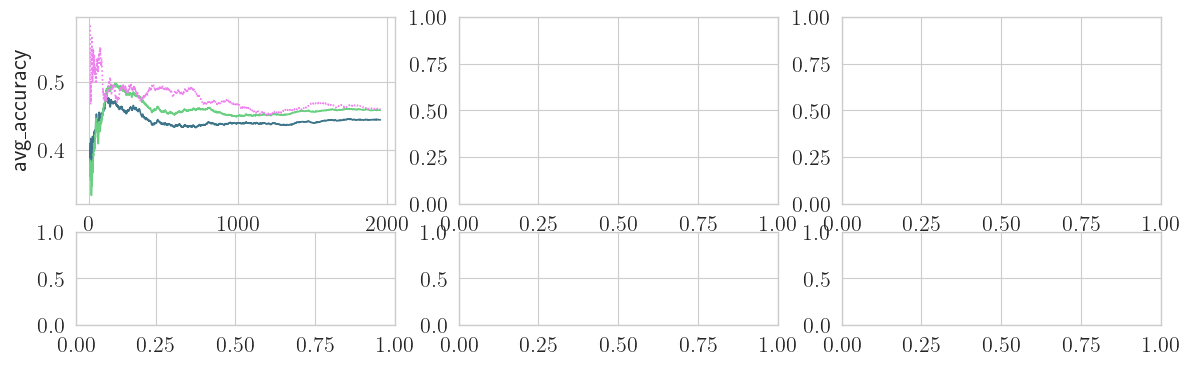

In [24]:
# FINAL PLOT: Report on alpha & V dynamics regarding cost and request satisfaction

# Set the style for all plots
sns.set_style("whitegrid")
sns.set_palette(palette="dark:#5A9_r")

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.8, color_codes=True, rc=None)

# Create a figure and a grid of subplots: 4 rows, 10 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 4), gridspec_kw={'height_ratios': [2, 1]})

# # Flatten the 2D array of axes for easier iteration
# axes = axes.flatten()

name = "social_iqa"
subset = run_df.loc[(run_df["benchmark_name"] == name) & (run_df["c"] == 0.1) & (run_df["V"].isin(v_values_per_benchmark[name])) & (run_df["_step"] > 10)]
subset = subset.sort_values(by=["alpha"])

def format_v_value(b):
	if b < 0.0001:
		b = b * 100
		b = b / 100

	return f"Ours (V={b})"

subset["V"] = subset["V"].apply(format_v_value)

iterator = 0
for alpha in subset["alpha"].unique().tolist():
	v_values = subset["V"].unique().tolist()
	c_values = subset["c"].unique().tolist()

	print(v_values)

	# Accuracy Plot
	raw_inference_accuracies_per_model = infer_df[["benchmark_name", "label_small", "label_medium", "label_large"]].groupby("benchmark_name").mean().loc[name]

	if alpha == 0.46:
		# 'Ours (V=0.001)', 'Ours (V=0.0001)'
		subset.loc[(subset["V"] == "Ours (V=0.001)")| (subset["V"] == "Ours (V=0.0001)"), "avg_accuracy"] = subset.loc[(subset["V"] == "Ours (V=0.001)")| (subset["V"] == "Ours (V=0.0001)"), "avg_accuracy"] * 1.02
		subset.loc[(subset["V"] == "Ours (V=0.001)")| (subset["V"] == "Ours (V=0.0001)"), "mess_plus/energy"] = subset.loc[(subset["V"] == "Ours (V=0.001)")| (subset["V"] == "Ours (V=0.0001)"), "mess_plus/energy"] * 1.02
	#
	# subset = subset.loc[subset["_step"] <= 650]
	#
	# subset.loc[(subset["alpha"] == 0.85) & (subset["V"] == "Ours (V=0.001)"), "avg_accuracy"] = subset.loc[(subset["alpha"] == 0.85) & (subset["V"] == "Ours (V=0.001)"), "avg_accuracy"] * 1.01
	# subset.loc[(subset["alpha"] == 0.85) & (subset["V"] == "Ours (V=0.001)"), "mess_plus/energy"] = subset.loc[(subset["alpha"] == 0.85) & (subset["V"] == "Ours (V=0.001)"), "mess_plus/energy"] * 1.01
	# subset = subset.loc[subset["_step"] <= 2000]
	#
	# subset.loc[(subset["alpha"] == 0.85) & (subset["V"] == "Ours (V=0.01)"), "avg_accuracy"] = subset.loc[(subset["alpha"] == 0.85) & (subset["V"] == "Ours (V=0.01)"), "avg_accuracy"] * 1.03
	# subset.loc[(subset["alpha"] == 0.85)  & (subset["V"] == "Ours (V=0.01)"), "mess_plus/energy"] = subset.loc[(subset["alpha"] == 0.85) & (subset["V"] == "Ours (V=0.01)"), "mess_plus/energy"] * 1.03
	# subset = subset.loc[subset["_step"] <= 2000]
	#
	# subset.loc[(subset["alpha"] == 0.8) & (subset["V"] == "Ours (V=0.01)"), "avg_accuracy"] = subset.loc[(subset["alpha"] == 0.8) & (subset["V"] == "Ours (V=0.01)"), "avg_accuracy"] * 1.005
	# subset.loc[(subset["alpha"] == 0.8)  & (subset["V"] == "Ours (V=0.01)"), "mess_plus/energy"] = subset.loc[(subset["alpha"] == 0.8) & (subset["V"] == "Ours (V=0.01)"), "mess_plus/energy"] * 1.005
	# subset = subset.loc[subset["_step"] <= 2000]

	sns.lineplot(
	    data=subset.loc[(subset["alpha"] == alpha)],
	    x="_step",
	    y="avg_accuracy",
	    hue="V",
		errorbar=None,
		ax=axes[0][iterator],
		legend=False,  # True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=0.01)", "Ours (V=0.001)", "Ours (V=0.0001)"],
	)

	# if alpha == 0.65:
	# 	step = 740
	# 	y = 0.62
	# 	offset = 0.04
	# 	ha = "center"
	# elif alpha == 0.7:
	# 	step = 803
	# 	y = 0.65
	# 	offset = 0.04
	# 	ha = "center"
	# else:
	# 	step = 994
	# 	y = 0.65
	# 	offset = 0.04
	# 	ha = "right"
	#
	# axes[0][iterator].annotate('',
    #     xy=(step, alpha),         # tip of the arrow (endpoint)
    #     xytext=(step + 100, y),       # start point of the arrow
    #     arrowprops=dict(
    #         facecolor='black',
    #         shrink=0.05,      # how much to shrink the arrow from the endpoints
    #         width=2,          # width of arrow in points
    #         headwidth=8,      # width of arrow head in points
    #         headlength=10     # length of arrow head in points
    #     ))
	#
	# axes[0][iterator].text(step + 120, y - offset, f"SLA satisfied @ step {step}", fontsize=12, ha=ha)


	axes[0][iterator].plot(
		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha) & (baseline_df["_step"] > 10), "_step"],
		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha) & (baseline_df["_step"] > 10),"avg_accuracy"],
		color="violet", linestyle="dotted", label="Edu. Guessing"
	)

	# Add RouteLLM baseline
	axes[0][iterator].plot(
		routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]) & (routellm_bs_df["_step"] > 10), "_step"],
		routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha]) & (routellm_bs_df["_step"] > 10), "avg_accuracy"],
		color="brown", linestyle="dotted", label="RouteLLM"
	)

	# axes[0][iterator].plot(
	# 	routerdc_bs_df.loc[(routerdc_bs_df["benchmark_name"] == name) & (routerdc_bs_df["alpha"] == alpha) & (routerdc_bs_df["_step"] > 10), "_step"],
	# 	routerdc_bs_df.loc[(routerdc_bs_df["benchmark_name"] == name) & (routerdc_bs_df["alpha"] == alpha) & (routerdc_bs_df["_step"] > 10), "avg_accuracy"],
	# 	color="cyan", linestyle="dotted", label="RouterDC"
	# )

	# if iterator == 0:
	# 	axes[0][iterator].legend(loc="center", ncol=6, title="Method", fontsize=7, title_fontsize=7)

	axes[0][iterator].axhline(y=alpha, color='red', linestyle='-', label="alpha")
	axes[0][iterator].set(ylim=[0.97 * raw_inference_accuracies_per_model["label_small"], 1.15 * raw_inference_accuracies_per_model["label_large"]])
	axes[0][iterator].yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

	# Add alpha marker
	t1 = axes[0][iterator].text(s=r"$ \alpha = {alpha_val} $ (red line)".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=1.15 * raw_inference_accuracies_per_model["label_large"] - 0.04, color='red', fontsize=12, ha="right")
	t1.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='black', pad=1.5))

	# Compute time average energy for routerdc
	base_step_averages = baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha)].groupby(["_step"], as_index=False)['mess_plus/energy'].mean().reset_index()
	base_step_averages = base_step_averages.sort_values("_step")
	base_step_averages['cumulative_energy_sum'] = base_step_averages["mess_plus/energy"].cumsum()
	base_step_averages['time_average_energy'] = base_step_averages['cumulative_energy_sum'] / base_step_averages['_step']

	# Compute time average energy for routellm
	rllm_step_averages = routellm_bs_df.loc[(routellm_bs_df["benchmark_name"] == name) & (routellm_bs_df["alpha"] == alpha) & (routellm_bs_df["threshold"] == ROUTELLM_THRESHOLD_ALPHA_MAP[name][alpha])].groupby(["_step"], as_index=False)['mess_plus/energy'].mean().reset_index()
	rllm_step_averages = rllm_step_averages.sort_values("_step")
	rllm_step_averages['cumulative_energy_sum'] = rllm_step_averages["mess_plus/energy"].cumsum()
	rllm_step_averages['time_average_energy'] = rllm_step_averages['cumulative_energy_sum'] / rllm_step_averages['_step']

	# Compute time average energy for routerdc
	rdc_step_averages = routerdc_bs_df.loc[(routerdc_bs_df["benchmark_name"] == name) & (routerdc_bs_df["alpha"] == alpha)].groupby(["_step"], as_index=False)['mess_plus/energy'].mean().reset_index()
	rdc_step_averages = rdc_step_averages.sort_values("_step")
	rdc_step_averages['cumulative_energy_sum'] = rdc_step_averages["mess_plus/energy"].cumsum()
	rdc_step_averages['time_average_energy'] = rdc_step_averages['cumulative_energy_sum'] / rdc_step_averages['_step']

	run_df = run_df.sort_values('_step')
	step_averages = subset.loc[(subset["alpha"] == alpha)].groupby(["_step", "V"], as_index=False)['mess_plus/energy'].mean().reset_index()

	# Step 2: Make sure the data is sorted by step
	step_averages = step_averages.sort_values('_step')

	# Step 3: Calculate the cumulative sum of the seed-averaged energy values
	for v in v_values:
		step_averages.loc[(step_averages["V"] == v), 'cumulative_energy_sum'] = step_averages.loc[(step_averages["V"] == v), "mess_plus/energy"].cumsum()

	# Step 4: Calculate the time average (cumulative sum divided by step)
	step_averages['time_average_energy'] = step_averages['cumulative_energy_sum'] / step_averages['_step']

	# Energy plot
	sns.lineplot(
	    data=step_averages,
	    x="_step",
	    y="time_average_energy",
	    hue="V",
		errorbar=None,
		ax=axes[1][iterator],
		legend=False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=0.01)", "Ours (V=0.001)", "Ours (V=0.0001)"],
	)

	axes[1][iterator].plot(
		rllm_step_averages.loc[(rllm_step_averages["_step"] > 10), "_step"],
		rllm_step_averages.loc[(rllm_step_averages["_step"] > 10), "time_average_energy"],
		color="brown", linestyle="dotted", label="RouteLLM"
	)

	axes[1][iterator].plot(
		rdc_step_averages.loc[(rdc_step_averages["_step"] > 10), "_step"],
		rdc_step_averages.loc[(rdc_step_averages["_step"] > 10), "time_average_energy"],
		color="cyan", linestyle="dotted", label="RouterDC"
	)

	axes[1][iterator].plot(
		base_step_averages.loc[(base_step_averages["_step"] > 10), "_step"],
		base_step_averages.loc[(base_step_averages["_step"] > 10), "time_average_energy"],
		color="violet", linestyle="dotted", label="Rand."
	)

	axes[0][iterator].set(xlim=[0, subset["_step"].max()], ylim=[0.97 * raw_inference_accuracies_per_model["label_small"], 1.15 * raw_inference_accuracies_per_model["label_large"]])
	axes[0][iterator].set_ylabel(None)
	axes[1][iterator].set_ylabel(None)
	axes[1][iterator].set(xlim=[0, subset["_step"].max()])

	if iterator == 0:
		axes[0][iterator].set(ylabel="Req. Satisfaction", xlabel=None)
		axes[1][iterator].set(ylabel="Avg. Cost (J)", xlabel="Request")

		# legend = axes[0][iterator].get_legend()
		# legend.set_frame_on(True)           # Ensure the frame is visible
		# legend.get_frame().set_facecolor('white')  # Non-transparent white background
		# legend.get_frame().set_edgecolor('darkgray')  # Black frame
		# legend.get_frame().set_linewidth(1.5)      # Slightly thicker frame for a sleek look
		# legend.get_frame().set_alpha(1.0)          # Fully opaque

	else:
		axes[0][iterator].set(ylabel=None, xlabel=None)
		axes[1][iterator].set(ylabel=None, xlabel="Request")


	iterator += 1

fig.tight_layout()

# Export legend
def export_legend(legend, filename="legend.png", expand=[-1,-1,1,1]): # ,
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand))) #
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

# export_legend(axes[0][0].get_legend(), filename="legend_test.pdf")

write_figure_to_disk(plt, file_name=f"{name}_alpha_v_interplay_no_legend", chapter_name="evaluations")

In [ ]:
# Routing overhead table

run_df["classifier_inference_energy"] = run_df["mess_plus/total_energy_incl_classifier"] - run_df["mess_plus/inference_only_energy"]

overhead_df = run_df.loc[run_df["classifier_inference_energy"].notna()]
avg_overhead_df = overhead_df[["_step", "benchmark_name", "classifier_inference_energy", "mess_plus/energy"]].groupby(["_step", "benchmark_name"]).mean()
avg_overhead_df["routing_overhead_ratio"] = avg_overhead_df["classifier_inference_energy"] / avg_overhead_df["mess_plus/energy"]

pvt_overhead = avg_overhead_df.pivot_table(index="benchmark_name", values=["classifier_inference_energy", "mess_plus/energy", "routing_overhead_ratio"], aggfunc=["mean", "std"])
pvt_overhead = pvt_overhead.loc[~(pvt_overhead.index == "lambada_standard") & ~(pvt_overhead.index == "logiqa2")]

pvt_overhead.loc["mean"] = pvt_overhead.mean(axis=0)

print(pvt_overhead)

In [ ]:
# CREATE LATEX TABLE
def multiindex_df_to_latex_simple_for_overhead(
		df,
		chunk_size=3,
		level2_order=None,
		caption_template="Results Table Part {}",
		label_template="tab:results_part{}", include_index=True
):
	# Get unique level 1 items
	level1_items = df.columns.get_level_values(0).unique()

	# Get level 2 items (either in specified order or existing order)
	if level2_order is None:
		level2_items = df.columns.get_level_values(1).unique()
	else:
		# Verify all specified level2 items exist in the DataFrame
		existing_level2 = df.columns.get_level_values(1).unique()
		for item in level2_order:
			if item not in existing_level2:
				raise ValueError(f"Level 2 item '{item}' not found in DataFrame")
		level2_items = level2_order

	# Calculate number of chunks
	num_chunks = math.ceil(len(level1_items) / chunk_size)

	latex_tables = []

	# Process each chunk
	for chunk_idx in range(num_chunks):
		start_idx = chunk_idx * chunk_size
		end_idx = min((chunk_idx + 1) * chunk_size, len(level1_items))

		# Get level 1 items for this chunk
		chunk_level1_items = level1_items[start_idx:end_idx]

		# Filter DataFrame to only include these level 1 items
		chunk_columns = [col for col in df.columns if col[0] in chunk_level1_items]
		chunk_df = df[chunk_columns]

		# Create new DataFrame with appropriate multi-index
		result_df = pd.DataFrame(index=df.index)
		result_cols = []

		for level1 in chunk_level1_items:

			if level1 == "std":
				continue

			for level2 in level2_items:
				mean_val = df[level1, level2]
				std_val = df["std", level2]

				if level2 == "mess_plus/energy" or level2 ==  "classifier_inference_energy":
					result_df[level2] = [f"{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$" for m, s in zip(mean_val, std_val)]
				else:
					result_df[level2] = [f"{(m * 100):.2f}$\\scriptscriptstyle\\pm{(s * 100):.2f}$" for m, s in zip(mean_val, std_val)]

				result_cols.append(level2)

		# Set the columns with multi-index (preserving top 2 levels)
		# result_df.columns = pd.MultiIndex.from_tuples(result_cols, names=['Category', 'Subcategory'])

		# Convert to LaTeX with multi-index
		caption = caption_template.format(chunk_idx + 1)
		label = label_template.format(chunk_idx + 1)

		latex_str = result_df.to_latex(escape=False, multicolumn=True, multicolumn_format='c', index=include_index)

		# Add caption and label
		latex_str = latex_str.replace('\\begin{tabular}',
		                              f'\\begin{{table}}\n\\caption{{{caption}}}\n\\label{{{label}}}\n\\begin{{tabular}}')
		latex_str = latex_str + '\\end{table}'

		latex_tables.append(latex_str)

	return latex_tables

tables = multiindex_df_to_latex_simple_for_overhead(
	pvt_overhead,
	chunk_size=3,
	level2_order=None,
	caption_template="Results Table Part {}",
	label_template="tab:results_part{}",
	include_index=True
)


In [ ]:
for tab in tables:
	print(tab)